# Decision Tree
- Non-linear model
- max_depths: decide the number of outputs
  - depth = 2 --> 2^2 outputs
  - depth = 4 --> 2^4 outputs

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import utils

In [2]:
# example and comparison with normalized ridge on linear and non-linear data
# visualize tree

### Comparison for linear dataset
- Decision tree vs. normalized ridge

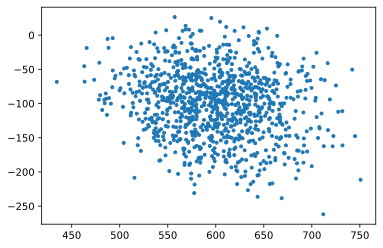

In [3]:
num_samples = 1000
num_features = 20
lin_X, lin_y = utils.make_linear_dataset(num_samples, num_features, target_noise_sigma=10)
plt.plot(np.sum(lin_X, axis=1), lin_y, lw=0, marker='.')
plt.show()

**Decision Tree**

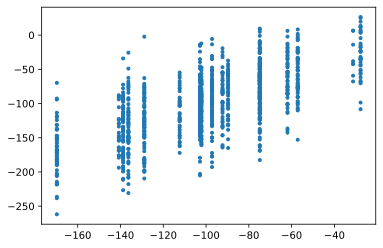

In [4]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=4)
tree.fit(lin_X, lin_y)

plt.plot(tree.predict(lin_X), lin_y, marker=".", lw=0)
plt.show()

MSE     1307.576734
MAE       28.831973
R^2        0.463092
Gini       0.670885
Name: DT4, dtype: float64

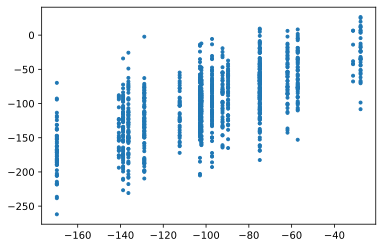

In [5]:
# decision tree

dt = utils.make_trained_decision_tree(lin_X, lin_y, depth=4)
y_dt = utils.decision_tree_predict(dt, lin_X)

sort_idxs = np.argsort(y_dt)
plt.plot(y_dt[sort_idxs], lin_y[sort_idxs], marker=".", lw=0)

dt_evals = utils.compute_evaluation_series(lin_y, y_dt, "DT4")
dt_evals

In [6]:
# ex 2.2.X: change depth of the tree to see how it changes the results. How can you explain the changes?
# ex 2.2.X: why it might be bad to use max possible depth?

MSE     1817.583315
MAE       34.213129
R^2        0.253677
Gini       0.480376
Name: DT2, dtype: float64

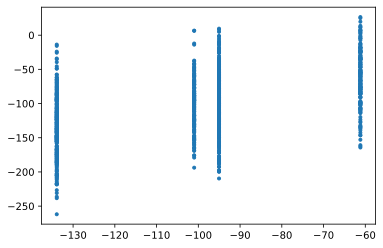

In [7]:
# depth=2 -> only 4 different values available (2^2)
dt2 = utils.make_trained_decision_tree(depth=2, X=lin_X, y=lin_y)
y_dt2 = utils.decision_tree_predict(dt2, X=lin_X)

plt.plot(y_dt2, lin_y, marker=".", lw=0)

dt_evals = utils.compute_evaluation_series(lin_y, y_dt2, "DT2")
dt_evals

MSE     741.555720
MAE      21.480909
R^2       0.695508
Gini      0.824071
Name: DT6, dtype: float64

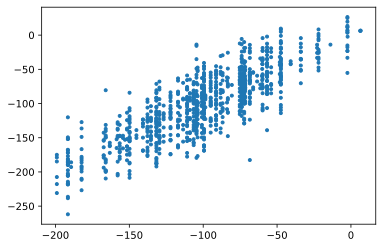

In [8]:
# depth=6 -> only 6 different values available (2^6)
dt6 = utils.make_trained_decision_tree(depth=6, X=lin_X, y=lin_y)
y_dt6 = utils.decision_tree_predict(dt6, X=lin_X)

plt.plot(y_dt6, lin_y, marker=".", lw=0)

dt_evals = utils.compute_evaluation_series(lin_y, y_dt6, "DT6")
dt_evals

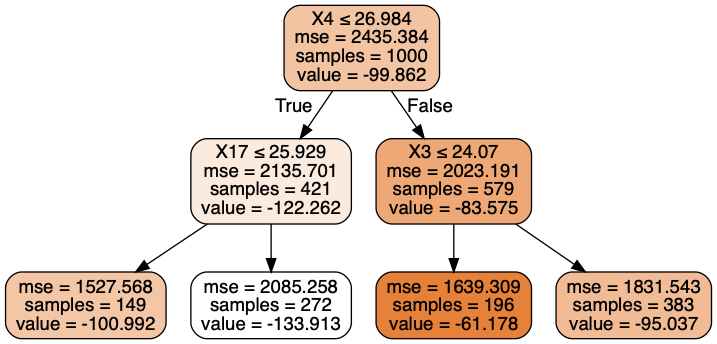

In [9]:
utils.get_tree_image(dt2)

MSE     99.098699
MAE      8.042908
R^2      0.959309
Gini     0.979373
Name: Ridge, dtype: float64

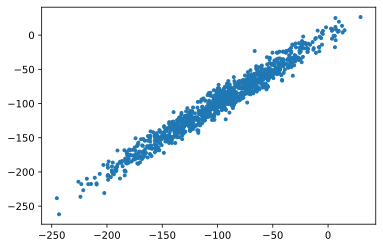

In [10]:
# norm ridge

y_ridge, w_ridge = utils.norm_ridge(lin_X, lin_y)

plt.plot(y_ridge, lin_y, marker=".", lw=0)

ridge_evals = utils.compute_evaluation_series(lin_y, y_ridge, "Ridge")
ridge_evals

In [11]:
# ridge is better than DT for linear data
pd.DataFrame([dt_evals, ridge_evals]).T

,DT6,Ridge
MSE,741.555720,99.098699
MAE,21.480909,8.042908
R^2,0.695508,0.959309
Gini,0.824071,0.979373


### Comparison for non-linear dataset
- Decision tree vs. normalized ridge

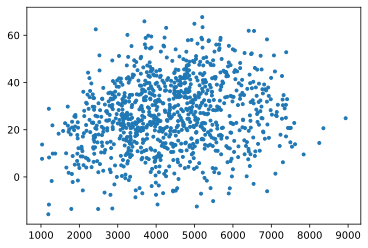

In [12]:
nl_X, nl_y = utils.make_non_linear_dataset(target_noise_sigma=10)
plt.plot(np.sum(nl_X, axis=1), nl_y, marker=".", lw=0)
plt.show()

MSE     123.242489
MAE       8.768659
R^2       0.460147
Gini      0.635139
Name: DT4, dtype: float64

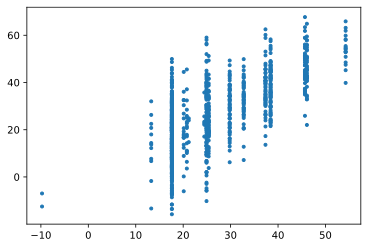

In [13]:
# decision tree
# 4 -> 6 -> 8 depth bigger, score better (because it's non-linear data)

dt = utils.make_trained_decision_tree(nl_X, nl_y, depth=4)
y_dt = utils.decision_tree_predict(dt, nl_X)

plt.plot(y_dt, nl_y, marker=".", lw=0)

dt_evals = utils.compute_evaluation_series(nl_y, y_dt, "DT4")
dt_evals

MSE     157.572508
MAE       9.984379
R^2       0.309767
Gini      0.545261
Name: Ridge, dtype: float64

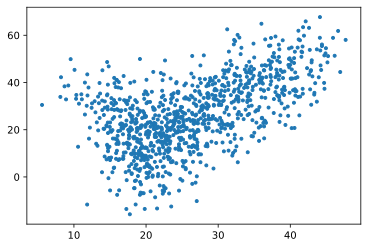

In [14]:
# norm ridge

y_ridge, w_ridge = utils.norm_ridge(nl_X, nl_y)

plt.plot(y_ridge, nl_y, marker=".", lw=0)

ridge_evals = utils.compute_evaluation_series(nl_y, y_ridge, "Ridge")
ridge_evals

In [15]:
# DT is better than ridge for non-linear dataset
pd.DataFrame([dt_evals, ridge_evals]).T

,DT4,Ridge
MSE,123.242489,157.572508
MAE,8.768659,9.984379
R^2,0.460147,0.309767
Gini,0.635139,0.545261
